<a href="https://colab.research.google.com/github/ashikshafi08/amazon_ml_2021/blob/main/Copy_of_Amazon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip

--2021-07-31 09:40:52--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.37
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip    2%[                    ]  23.49M  7.07MB/s    eta 2m 28s ^C


In [ ]:
!unzip /content/dataset52a7b21.zip

Archive:  /content/dataset52a7b21.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dataset52a7b21.zip or
        /content/dataset52a7b21.zip.zip, and cannot find /content/dataset52a7b21.zip.ZIP, period.


In [ ]:
!mv /content/dataset/ /content/drive/MyDrive/

mv: cannot stat '/content/dataset/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/dataset/train.csv'
test_path = '/content/drive/MyDrive/dataset/test.csv'
sample_sub_path = '/content/drive/MyDrive/dataset/sample_submission.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [ ]:
# Loading in the data 
train_data = pd.read_csv(train_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)

# Loading the test dataset 
test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)
# # Sample submission 
sample_sub = pd.read_csv(sample_sub_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)



## Working with a subset 

In [ ]:
test_data.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero


#### Multi-Input Model 

In [ ]:
# Getting the subset of the sample 
train_sample = train_data.sample(frac= 1 , random_state= 42)
#val_sample = train_data.sample(frac = 0.1 , random_state= 3)

In [ ]:
# X = train_sample.drop('BROWSE_NODE_ID' , axis = 1)
# y = train_sample['BROWSE_NODE_ID']

# X.shape , y.shape
# # from sklearn.model_selection import StratifiedShuffleSplit
# # strat_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.3 , train_size= 0.7  , random_state = 42)
# train_sample.head().T
# y

# for train_index , test_index in strat_split.split(X, y):
#   X_train , X_test = X[train_index] , X[test_index]
#   y_train , y_test = y[train_index] , y[test_index]
# train_sample.BROWSE_NODE_ID.value_counts()
# train_sample.shape , val_sample.shape
# train_sample.head()
# test_data.head(10)
# train_data.isna().sum()
# train_sample['Info'] = train_sample.DESCRIPTION.astype(str) + '  '+  train_sample.BULLET_POINTS.astype(str)
# train_sample.head(10)
# train_sample['BULLET_POINTS']
# train_sample['BROWSE_NODE_ID']
# train_sample[['TITLE' , 'Info']].values

In [ ]:
new_train_sample = train_sample.copy()
new_train_sample.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003


In [ ]:
new_train_sample = new_train_sample.drop(columns = [] , axis = 1)

In [ ]:
new_train_sample

,TITLE,BRAND,BROWSE_NODE_ID
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",AMSIK,32296
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea,35
1125035,ROZVEH Women's Shift Brown Dress,ROZVEH,1724
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Generic,465
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Q-rious,2003
...,...,...,...
1692743,Zemic Baby Waterproof Double Sided Mat (6 X 5 ...,Zemic,1217
2356330,The Design Cart Stainless Steel Style A Needle...,The Design Cart,21895
2229084,SOCH Women's Cotton Straight Kurta NC KT 4402-...,Soch,1251
2768307,Kuber Industries 100 Percent Cotton 144 TC Sin...,Kuber Industries,1084


In [ ]:
# Are there 9919 classes 
(new_train_sample.BROWSE_NODE_ID > 9919)
new_train_sample = new_train_sample.drop(new_train_sample[new_train_sample.BROWSE_NODE_ID > 9919].index,axis = 0 )

# Creating a token level embedding 

In [ ]:
# # Picking up the train text data 
# info_train_sentences = new_train_sample['Info'].to_list()
# title_train_sentences = new_train_sample['TITLE'].astype(str).to_list()

# # Now our val dataset 


# len(info_train_sentences) , len(title_train_sentences)

# title_train_sentences[:10]
# # Average sequence length 
# info_sent_lens = [len(sentence.split()) for sentence in info_train_sentences]
# title_sent_lens = [len(title.split()) for title in title_train_sentences]

# avg_sent_len_info = np.mean(info_sent_lens)
# avg_sent_len_title = np.mean(title_sent_lens)

# avg_sent_len_info , avg_sent_len_title
# round(avg_sent_len_info) , round(avg_sent_len_title)
# # Distribution of the tokens 
# plt.hist(info_sent_lens , bins = 7);
# plt.hist(title_sent_lens , bins = 7);
# # How long of a sentence covers 95% of a length 
# info_output_seq_len = int(np.percentile(info_sent_lens , 95))
# title_output_seq_len = int(np.percentile(title_sent_lens , 95))

# info_output_seq_len , title_output_seq_len
# # Maximum sentence in the training sentence of both info and title 
# max(info_sent_lens) , max(title_sent_lens)
# round(len(info_train_sentences) / 6)
# from random import sample 
# little_info_train_sentences = sample(info_train_sentences ,683837)
# len(little_info_train_sentences)
# # Creating a text vectorizer layer for info (token level embedding)
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# info_text_vect_token_layer = TextVectorization(max_tokens= 5000 , 
#                                                output_sequence_length = info_output_seq_len)

# # Adapting the layer on the train data 
# info_text_vect_token_layer.adapt(little_info_train_sentences)
# # Test out text vectorizer
# import random
# target_sentence = random.choice(info_train_sentences)
# print(f"Text:\n{target_sentence}")
# print(f"\nLength of text: {len(target_sentence.split())}")
# print(f"\nVectorized text:\n{info_text_vect_token_layer([target_sentence])}")
# # Creating a text vectorizer layer for title (token level embedding)
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# title_text_vect_token_layer = TextVectorization(max_tokens= 3000 , 
#                                                output_sequence_length = title_output_seq_len)

# # Adapting the layer on the train data 
# title_text_vect_token_layer.adapt(title_train_sentences)
# # Test out text vectorizer (title)
# import random
# target_sentence = random.choice(title_train_sentences)
# print(f"Text:\n{target_sentence}")
# print(f"\nLength of text: {len(target_sentence.split())}")
# print(f"\nVectorized text:\n{title_text_vect_token_layer([target_sentence])}")
# # Now one hot encoding the labels 
# from sklearn.preprocessing import OneHotEncoder
# one_hot_encoder = OneHotEncoder(sparse = False)
# sample_train_labels_one_hot = one_hot_encoder.fit_transform()

# trying to make model with universal scentence encoder 


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
new_train_sample = new_train_sample.drop(new_train_sample[new_train_sample.TITLE.isna()].index, axis = 0 )

In [ ]:
new_train_sample.isna().sum()

TITLE                  0
DESCRIPTION       652846
BULLET_POINTS     141130
BRAND              48577
BROWSE_NODE_ID         0
dtype: int64

In [ ]:
base_layer_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
x = base_layer_1(inputs)
x = tf.keras.layers.Dense(264, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation= 'relu')(x)
outputs = tf.keras.layers.Dense(9919, activation ='softmax')(x)
model = tf.keras.Model(inputs, outputs)

NameError: ignored

In [ ]:
model.summary()

In [ ]:
model.compile(loss =tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = 'accuracy')

In [ ]:
new_train_sample['BRAND_DESC']= new_train_sample['BRAND'] + new_train_sample['DESCRIPTION']

In [ ]:
new_train_sample.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,BRAND_DESC
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,NiveaNivea Sun Fac Sun Block Whitening Cream S...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"ROZVEH<p>Super Fine Rayon,&nbsp;Brown Floral P..."
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,GenericNarayan creatins pashmina unstitched pa...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Q-riousTrendy Q-rious Spagetti with sequin det...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,NaN,"[Made with a portion of recycled polyester,Pat...",Hanes,3355,NaN


In [ ]:
new_train_sample = new_train_sample.drop(columns = ['DESCRIPTION','BULLET_POINTS','BRAND'],axis = 1 )

In [ ]:
new_train_sample.head()

,TITLE,BROWSE_NODE_ID,BRAND_DESC
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,35,NiveaNivea Sun Fac Sun Block Whitening Cream S...
1125035,ROZVEH Women's Shift Brown Dress,1724,"ROZVEH<p>Super Fine Rayon,&nbsp;Brown Floral P..."
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,465,GenericNarayan creatins pashmina unstitched pa...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,2003,Q-riousTrendy Q-rious Spagetti with sequin det...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,3355,NaN


In [ ]:
new_train_sample = new_train_sample.fillna(value = 'NAN')

In [ ]:
import tensorflow as tf 

In [ ]:
train_dataset_inputs= tf.data.Dataset.from_tensor_slices(new_train_sample['BRAND_DESC'].to_numpy().astype(np.str))
train_dataset_outputs = tf.data.Dataset.from_tensor_slices(new_train_sample['BROWSE_NODE_ID'].to_numpy())
train_dataset = tf.data.Dataset.zip((train_dataset_inputs, train_dataset_outputs)).batch(64).prefetch(tf.data.AUTOTUNE)

In [ ]:
max(new_train_sample['BROWSE_NODE_ID'])

9918

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
first_model = model.fit(train_dataset,
                        # steps_per_epoch= len(train_dataset)*0.1,
                        epochs =2)

Epoch 1/2
161239/161239 [==============================] - 1591s 10ms/step - loss: 1.5212 - accuracy: 0.6704
Epoch 2/2
161239/161239 [==============================] - 1605s 10ms/step - loss: 1.5572 - accuracy: 0.6657


In [ ]:
model.save('/content/drive/MyDrive/amazonMLMOdel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/amazonMLMOdel/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/amazonMLMOdel/assets


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_data.TITLE.to_numpy().astype(np.str))

In [ ]:
predictions = model.predict(test_data.TITLE.to_numpy().astype(np.str))

AttributeError: ignored

In [ ]:
predictions

array([[6.5257482e-04, 1.4555699e-03, 2.6876099e-10, ..., 5.9115803e-11,
        5.9682731e-11, 2.5518340e-14],
       [3.4974320e-05, 6.4715359e-06, 1.1606459e-09, ..., 2.3866509e-10,
        2.4213978e-10, 5.7219181e-09],
       [2.5419535e-05, 4.4640154e-02, 4.5862314e-11, ..., 8.0822822e-12,
        8.1775533e-12, 1.7029080e-16],
       ...,
       [1.3493769e-05, 1.3216479e-09, 2.0575978e-12, ..., 3.5456870e-13,
        3.5617513e-13, 1.2033014e-19],
       [1.0833445e-08, 1.9925132e-17, 2.5931163e-14, ..., 8.9276536e-15,
        8.7166543e-15, 3.6360047e-27],
       [7.9640799e-05, 1.8017005e-10, 4.1103575e-11, ..., 8.9082127e-12,
        8.8726708e-12, 1.5820127e-13]], dtype=float32)

In [ ]:
prediction_values = np.argmax(predictions,axis =1)

 loading the model 

In [ ]:
Model_1 = tf.keras.models.load_model('/content/drive/MyDrive/amazonMLMOdel')

In [ ]:
Model_1.evaluate(train_dataset.take(2))

2/2 [==============================] - 0s 12ms/step - loss: 1.7172 - accuracy: 0.6875


[1.7172269821166992, 0.6875]

In [ ]:
!nvidia-smi

Sun Aug  1 04:24:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# building another model 


In [ ]:
base_layer_2 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128/2', trainable = False)

In [ ]:
base_layer_3 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2',trainable = False)

In [ ]:
import tensorflow.keras.layers as layers

# Setting up input/output for title 
title_inputs = layers.Input(shape = [] , dtype = tf.string , name = 'title_input')
title_embed = base_layer_1(title_inputs)
title_outputs = layers.Dense(128 , activation = 'relu')(title_embed)
title_model = tf.keras.Model(inputs = title_inputs , outputs = title_outputs)



# Setting up input/outputs for info 
info_inputs = layers.Input(shape = [] , dtype= tf.string , name = 'Info_input')
info_embed = base_layer_1(info_inputs)
# info_lstm = layers.LSTM(50 , activation= 'tanh')(info_embed)
x = layers.Dense(264,activation = 'relu')(info_embed)
x = layers.Dense(256, activation ='relu')(x)
info_outputs = layers.Dense(128 , activation = 'relu')(x)
info_model = tf.keras.Model(inputs = info_inputs , outputs = info_outputs)


# Concatenating title and info inputs (hybrid)
title_info_concat = layers.Concatenate(name = 'title_info_hybrid')([title_model.output , info_model.output])


# Creating output layer 
# com_dropout = layers.Dropout(0.5)(title_info_concat)
com_dense = layers.Dense(512 , activation= 'relu')(title_info_concat)
# fin_drop = layers.Dropout(0.4)(com_dense)
output_layer = layers.Dense(9919, activation ='softmax')(com_dense)


# Constructing model with title and info inputs 
mult_model = tf.keras.Model(inputs = [title_model.input , info_model.input], 
                            outputs = output_layer , name = 'multi_input_model_1')

# Summary of the model 
mult_model.summary()

Model: "multi_input_model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
Info_input (InputLayer)         [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 512)          256797824   title_input[0][0]                
                                                                 Info_input[0][0]                 
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 264)          135432      keras_layer[7][

In [ ]:
new_train_sample.isna().sum()

TITLE                 0
BRAND             48577
BROWSE_NODE_ID        0
dtype: int64

In [ ]:
new_train_sample.fillna(value = 'NAN').isna().sum()

TITLE             0
BRAND             0
BROWSE_NODE_ID    0
dtype: int64

In [ ]:
new_train_sample = new_train_sample.fillna(value = 'NAN')

In [ ]:
training_dataset_1_inputs = tf.data.Dataset.from_tensor_slices((new_train_sample['TITLE'].to_numpy().astype(np.str), new_train_sample['BRAND'].to_numpy().astype(np.str)))

In [ ]:
training_dataset_1_outputs = tf.data.Dataset.from_tensor_slices(new_train_sample['BROWSE_NODE_ID'].to_numpy())

In [ ]:
training_dataset_1 = tf.data.Dataset.zip((training_dataset_1_inputs,training_dataset_1_outputs)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# compiling the model 
mult_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ['accuracy'])

In [ ]:
modified_df.isna().sum()

Unnamed: 0             0
TITLE                  6
DESCRIPTION       117178
BULLET_POINTS      41587
BRAND              13025
BROWSE_NODE_ID         0
dtype: int64

In [ ]:
#fitting the model 
model_1 = mult_model.fit(LSTM_dataset, 
                         steps_per_epoch = len(LSTM_dataset)*0.2 ,
                         epochs = 3)

Epoch 1/3
3442/3442 [==============================] - 60s 17ms/step - loss: 8.0535 - accuracy: 0.0195
Epoch 2/3
1985/3442 [================>.............] - ETA: 24s - loss: 9.0475 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
mult_model.save('/content/drive/MyDrive/mult_model_normalization_correct')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/mult_model_normalization_correct/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/mult_model_normalization_correct/assets


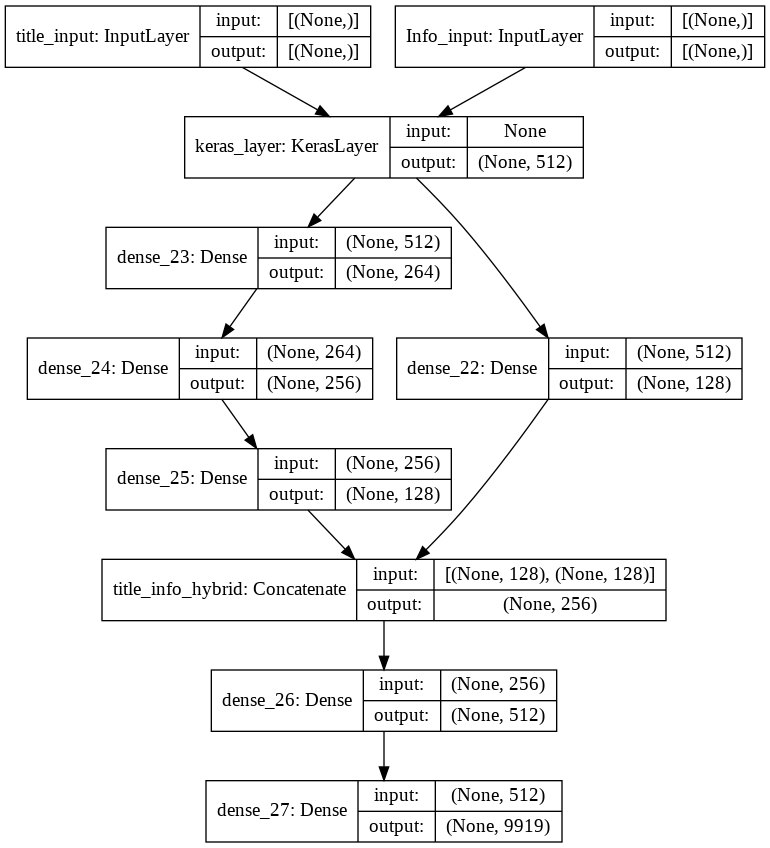

In [ ]:
# plotting the model 
tf.keras.utils.plot_model(mult_model,show_shapes= True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data.TITLE.to_numpy().astype(np.str),test_data['BRAND'].to_numpy().astype(np.str)))

In [ ]:
predictions = mult_model.predict((test_data.TITLE.to_numpy().astype(np.str),test_data['BRAND'].to_numpy().astype(np.str)))

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.head()

""


In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.head()

,PRODUCT_ID
0,1
1,2
2,3
3,4
4,5


In [ ]:
prediction_values = np.argmax(predictions,axis =1)

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',prediction_values)

In [ ]:
submission.head()

,PRODUCT_ID,BROWSE_NODE_ID
0,1,1140
1,2,2793
2,3,2637
3,4,604
4,5,7644


In [ ]:
submission.to_csv('/content/big_model_submission.csv',index=False)

In [ ]:
test_data.isna().sum()

PRODUCT_ID           0
TITLE                7
DESCRIPTION      10469
BULLET_POINTS     6786
BRAND             2430
dtype: int64

In [ ]:
big_model = tf.keras.models.load_model('/content/drive/MyDrive/mult_model')

In [ ]:
big_model.evaluate(training_dataset_1.take(2))

2/2 [==============================] - 1s 15ms/step - loss: 1.2085 - accuracy: 0.7344


[1.2085154056549072, 0.734375]

In [ ]:
test_data = test_data.fillna('NAN')

In [ ]:
predictions = big_model.predict((test_data.TITLE.to_numpy().astype(np.str),test_data.BRAND.to_numpy().astype(np.str)))

In [ ]:
prediction_values = np.argmax(predictions,axis =1)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',prediction_values)

In [ ]:
submission.head()

,PRODUCT_ID,BROWSE_NODE_ID
0,1,1140
1,2,2793
2,3,2637
3,4,604
4,5,7644


In [ ]:
submission.to_csv('./basic_submission_2.csv')

In [ ]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext


In [ ]:
model_normalization = tf.keras.models.load_model('/content/drive/MyDrive/mult_model_normalization_correct')

In [ ]:
test_data.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero


In [ ]:
model_normalization.evaluate(training_dataset_1.take(2))

2/2 [==============================] - 2s 9ms/step - loss: 1.8197 - accuracy: 0.6406


[1.8197293281555176, 0.640625]

In [ ]:
predictions = model_normalization.predict((test_data.TITLE.to_numpy().astype(np.str),test_data.BRAND.to_numpy().astype(np.str)))

In [ ]:
prediction_values = predictions.argmax(axis= 1 )

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',prediction_values)

In [ ]:
submission.head()

,PRODUCT_ID,BROWSE_NODE_ID
0,1,1602
1,2,89
2,3,4
3,4,125
4,5,7644


In [ ]:
submission.to_csv('amazon_ML_submission.csv',index=False)

In [ ]:
print('hello')

hello


In [ ]:
base_layer_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_model_layer = base_layer_1(inputs)
lam_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(base_model_layer)
x = tf.keras.layers.LSTM(564)(lam_layer)
x = tf.keras.layers.Dense(1080, activation= 'relu')(x)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(x)

conv_model = tf.keras.Model(inputs, outputs)

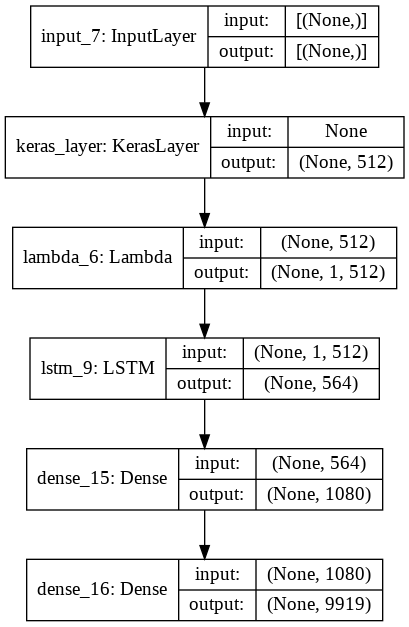

In [ ]:
tf.keras.utils.plot_model(conv_model,show_shapes=  True)

In [ ]:
train_dataset = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices(modified_df.TITLE.to_numpy().astype(np.str)),
    tf.data.Dataset.from_tensor_slices(modified_df.BROWSE_NODE_ID.to_numpy().astype(np.float32))
)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
conv_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics =['accuracy']
)

conv_model_history = conv_model.fit(train_dataset.repeat(),
                                    batch_size = 32, 
                                    steps_per_epoch = len(train_dataset)* 0.2 ,
                                    epochs = 15,
                                    callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/MODEL_CHECKPOINT_LSTM',save_best_only= True, save_weights_only=True)])

Epoch 1/15
3442/3442 [==============================] - 51s 14ms/step - loss: 8.6453 - accuracy: 0.0131


Epoch 2/15
2268/3442 [==================>...........] - ETA: 16s - loss: 9.7063 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
conv_model.save('/content/drive/MyDrive/LSTM.h5')

In [ ]:
for layer in conv_model.layers:
  print(layer.trainable)

True
True
True
True
True
True


In [ ]:
base_layer_1.trainable = True
# print("Number of layers in the base model: ", len(base_layer_1.layer.layers))


In [ ]:
base_layer_1.layers

AttributeError: ignored

In [ ]:

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_layer_1.layers[:fine_tune_at]:
  layer.trainable =  False


AttributeError: ignored

In [ ]:
conv_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(lr =0.0001 ),
    metrics =['accuracy']
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
conv_model.summary()
len(conv_model.trainable_variables)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
lambda (Lambda)              (None, 1, 512)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 564)               2429712   
_________________________________________________________________
dense (Dense)                (None, 1080)              610200    
_________________________________________________________________
dense_1 (Dense)              (None, 9919)              10722439  
Total params: 270,560,175
Trainable params: 270,560,175
Non-trainable params: 0
_______________________________________________

187

In [ ]:

total_epochs =  25

history_fine = conv_model.fit(train_dataset.repeat(),
                         epochs=total_epochs,
                         initial_epoch=conv_model_history.epoch[-1],
                         steps_per_epoch =int(len(train_dataset) * 0.2) )

Epoch 15/25
8062/8062 [==============================] - 685s 84ms/step - loss: 0.7903 - accuracy: 0.8046
Epoch 16/25
8062/8062 [==============================] - 679s 84ms/step - loss: 0.7321 - accuracy: 0.8162
Epoch 17/25
8062/8062 [==============================] - 677s 84ms/step - loss: 0.6883 - accuracy: 0.8266
Epoch 18/25
8062/8062 [==============================] - 675s 84ms/step - loss: 0.6344 - accuracy: 0.8381
Epoch 19/25
8062/8062 [==============================] - 675s 84ms/step - loss: 0.5767 - accuracy: 0.8511
Epoch 20/25
8062/8062 [==============================] - 676s 84ms/step - loss: 0.5602 - accuracy: 0.8574
Epoch 21/25
8062/8062 [==============================] - 675s 84ms/step - loss: 0.5209 - accuracy: 0.8665
Epoch 22/25
8062/8062 [==============================] - 676s 84ms/step - loss: 0.4945 - accuracy: 0.8730
Epoch 23/25
8062/8062 [==============================] - 679s 84ms/step - loss: 0.4579 - accuracy: 0.8822
Epoch 24/25
8062/8062 [=======================

In [ ]:
conv_model.save('/content/drive/MyDrive/HIGH_ACC_LSTM.h5')  

In [ ]:
conv_model.fit(train_dataset, batch_size = 32 , epochs = 3)

Epoch 1/3
80620/80620 [==============================] - 811s 10ms/step - loss: 1.1134 - accuracy: 0.7415
Epoch 2/3
80620/80620 [==============================] - 803s 10ms/step - loss: 1.0019 - accuracy: 0.7629
Epoch 3/3
80620/80620 [==============================] - 806s 10ms/step - loss: 0.9357 - accuracy: 0.7753


In [ ]:
conv_model.save('/content/drive/MyDrive/LSTM_MODEL_AMAZON')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM_MODEL_AMAZON/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/LSTM_MODEL_AMAZON/assets


In [ ]:
test_data.isna().sum()

PRODUCT_ID       0
TITLE            0
DESCRIPTION      0
BULLET_POINTS    0
BRAND            0
dtype: int64

In [ ]:
test_data = test_data.fillna('NAN')

In [ ]:
test_data.isna().sum()

In [ ]:
LSTM_predictions  = conv_model.predict(test_data.TITLE.to_numpy().astype(np.str))

In [ ]:
LSTM_prediction_values = np.argmax(LSTM_predictions,axis =1)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.head()

In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.head()

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',LSTM_prediction_values)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('./LSTM_preds_mod.csv')

In [ ]:
test_data = test_data.fillna('NAN')

In [ ]:
test_data.isna().sum()

In [ ]:
LSTM_predictions  = conv_model.predict(test_data.TITLE.to_numpy().astype(np.str))

In [ ]:
LSTM_prediction_values = np.argmax(LSTM_predictions,axis =1)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.head()

In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.head()

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',LSTM_prediction_values)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('./LSTM_preds_mod.csv')

# Bidirectional LSTM with 2 lstm starting "

In [ ]:
def preprocess_dataframe(df,shuffle = True,drop_cols = ['DESCRIPTION' , 'BULLET_POINTS'] ,fill_na = True ):
  if shuffle: 
    df = df.sample(frac= 1 , random_state= 42)
  df = df.drop(df[df.BROWSE_NODE_ID > 9919].index,axis = 0 )
  if fill_na : 
    df = df.fillna(value = 'NAN')
  
  print(f'numrs of none values {df.isna().sum()}')
  return df 

  

In [ ]:
preprocessed_df = preprocess_dataframe(train_data)

numrs of none values TITLE             0
DESCRIPTION       0
BULLET_POINTS     0
BRAND             0
BROWSE_NODE_ID    0
dtype: int64


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
preprocessed_df['brand_description'] = preprocessed_df['BRAND'].astype(str) + ' ' + preprocessed_df['DESCRIPTION'].astype(str)
preprocessed_df.head(10)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,new_description,brand_description
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Nivea Sun Fac Sun Block Whitening Cream ...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","ROZVEH <p>Super Fine Rayon,&nbsp;Brown Floral ..."
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NAN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Generic Narayan creatins pashmina unstitched p...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Trendy Q-rious Spagetti with sequin de...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,NAN,"[Made with a portion of recycled polyester,Pat...",Hanes,3355,NAN,Hanes NAN
1306751,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...,Explore wide range of home décor products from...,"[Quality Guaranteed,Easy Return and Exchange,L...",Verca,1287,Explore wide range of home décor products from...,Verca Explore wide range of home décor product...
2031708,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...,Pure Satin Silk Lehenga Blouse Set. Featuring ...,"[Wash Care : Dry Clean and Hend Wash.,In the P...",EVERWILLOW,5173,Pure Satin Silk Lehenga Blouse Set. Featuring ...,EVERWILLOW Pure Satin Silk Lehenga Blouse Set....
1093990,Vimes All Side Protection Sleek Rubberised Mat...,"<p>""</p> <p><strong>Vimes back cover case for ...",[Camera Protection Technology - Introducing Ou...,VIMES,2040,"<p>""</p> <p><strong>Vimes back cover case for ...","VIMES <p>""</p> <p><strong>Vimes back cover cas..."
2112975,Generic Back Cover Soft Silicon Back Cover for...,This Back Cover Is A Soft Silicon Case.It Is T...,"[Perfect Fit,Light Weight,Easy To Apply,Ultrat...",Generic,1045,This Back Cover Is A Soft Silicon Case.It Is T...,Generic This Back Cover Is A Soft Silicon Case...
1003808,Amante Cotton Padded Underwire Push-Up Plunge ...,NAN,"[Padded & wired,Demi cup,Fully adjustable & de...",Amante,773,NAN,Amante NAN


In [ ]:
# Stripping off html tags 
import re 

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

preprocessed_df['brand_description'] = preprocessed_df['brand_description'].apply(lambda x: cleanhtml(x))
preprocessed_df['brand_description']

2078681    Nivea Nivea Sun Fac Sun Block Whitening Cream ...
1125035    ROZVEH Super Fine Rayon,&nbsp;Brown Floral Pri...
1928801    Generic Narayan creatins pashmina unstitched p...
864509     Q-rious Trendy Q-rious Spagetti with sequin de...
1613202                                            Hanes NAN
                                 ...                        
732180     SPORTO FITNESS SPORTO FITNESSTM Flat Bench Wor...
110268                                            Lenovo NAN
1692743    Zemic SOFT FOAM PLAYMAT: Extra-cushioned, soft...
2229084                                             Soch NAN
2768307                                 Kuber Industries NAN
Name: brand_description, Length: 2579890, dtype: object

In [ ]:
preprocessed_df.isna().sum()

TITLE                0
DESCRIPTION          0
BULLET_POINTS        0
BRAND                0
BROWSE_NODE_ID       0
new_description      0
brand_description    0
dtype: int64

In [ ]:
LSTM_inputs = tf.data.Dataset.from_tensor_slices((preprocessed_df.TITLE.to_numpy().astype(np.str),preprocessed_df['brand_description'].astype(str).to_numpy()))

In [ ]:
LSTM_outputs = tf.data.Dataset.from_tensor_slices(preprocessed_df.BROWSE_NODE_ID.to_numpy())

In [ ]:
LSTM_dataset = tf.data.Dataset.zip((LSTM_inputs, LSTM_outputs)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
base_layer_2 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128/2', trainable = False)
base_layer_3 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2',trainable = False)
base_layer_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_model_layer = base_layer_1(inputs)
lam_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(base_model_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(400,return_sequences=True))(lam_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1080))(x)

brand_inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
y = base_layer_1(brand_inputs)
y = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(y)
y  = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(450))(y)
# y = tf.keras.layers.LSTM(564)(y)
y = tf.keras.layers.Dense(1080)(y)

concat = tf.keras.layers.concatenate(((x,y)))


z = tf.keras.layers.Dense(264, activation= 'relu')(concat)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(z)
LSTM_MODEL_1 = tf.keras.Model((inputs, brand_inputs), outputs)

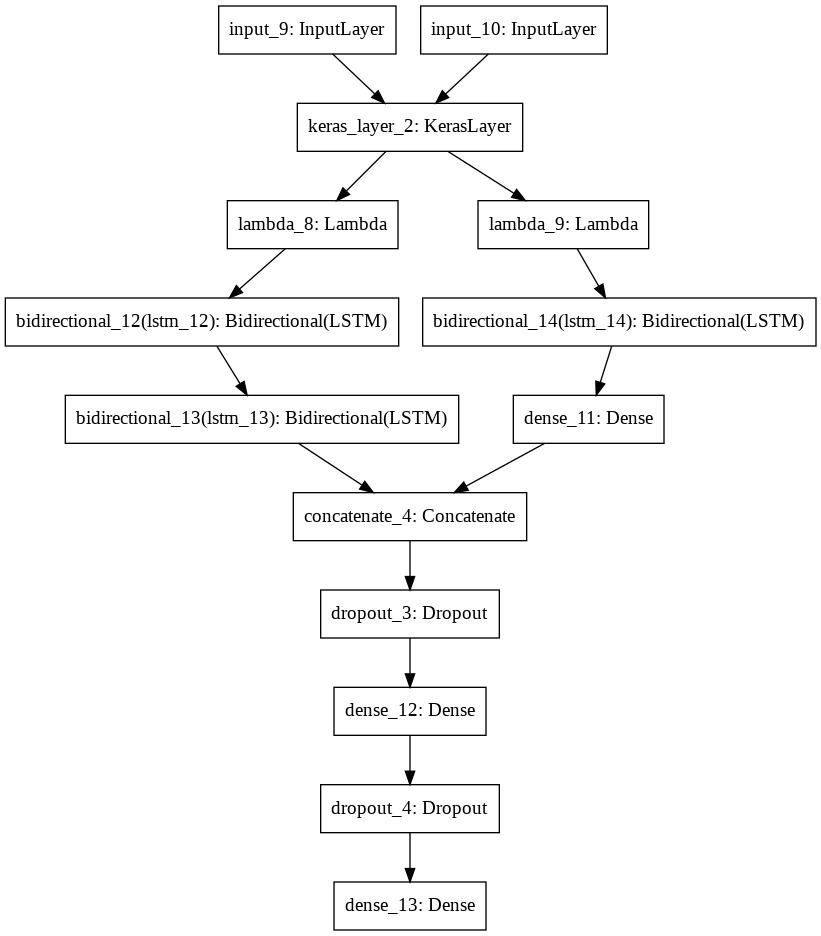

In [ ]:
tf.keras.utils.plot_model(LSTM_MODEL_1)

In [ ]:
LSTM_MODEL_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
LSTM_MODEL_1.fit(LSTM_dataset,
                 steps_per_epoch= int(len(LSTM_dataset) * 0.1),
                 batch_size = 32,
                 epochs = 10)

Epoch 1/10
8062/8062 [==============================] - 222s 27ms/step - loss: 2.7658 - accuracy: 0.4794
Epoch 2/10
8062/8062 [==============================] - 215s 27ms/step - loss: 1.6895 - accuracy: 0.6324
Epoch 3/10
8062/8062 [==============================] - 214s 27ms/step - loss: 1.4515 - accuracy: 0.6735
Epoch 4/10
8062/8062 [==============================] - 213s 26ms/step - loss: 1.3331 - accuracy: 0.6948
Epoch 5/10
8062/8062 [==============================] - 215s 27ms/step - loss: 1.2675 - accuracy: 0.7084
Epoch 6/10
8062/8062 [==============================] - 215s 27ms/step - loss: 1.2186 - accuracy: 0.7182
Epoch 7/10
8062/8062 [==============================] - 214s 27ms/step - loss: 1.1869 - accuracy: 0.7261
Epoch 8/10
8062/8062 [==============================] - 216s 27ms/step - loss: 1.1567 - accuracy: 0.7323
Epoch 9/10
8062/8062 [==============================] - 217s 27ms/step - loss: 1.1363 - accuracy: 0.7370
Epoch 10/10
8062/8062 [==============================] 

In [ ]:
LSTM_MODEL_1.fit(LSTM_dataset, 
                 batch_size = 32,  
                 epochs = 10 
                 )

Epoch 1/10
  168/80622 [..............................] - ETA: 36:28 - loss: 1.1061 - accuracy: 0.7467

In [ ]:
LSTM_MODEL_1.save('/content/drive/MyDrive/amazon_ml/LSTM_MODEL_preprocessed')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/amazon_ml/LSTM_MODEL_preprocessed/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/amazon_ml/LSTM_MODEL_preprocessed/assets


In [ ]:
def make_predictions(model, test_data,test_dataframe):
  predictions = model.predict(test_data)
  prediction_values = np.argmax(predictions,axis = 1)
  submission_dataframe = pd.DataFrame()
  submission_dataframe.insert(0,'PRODUCT_ID',value = test_dataframe.PRODUCT_ID)
  submission_dataframe.insert(1,'BROWSE_NODE_ID',prediction_values)
  print(submission_dataframe.head())
  return submission_dataframe


In [ ]:
test_data['brand_description'] = test_data['BRAND'].astype(str) + ' ' + test_data['DESCRIPTION'].astype(str)

In [ ]:
#test_data = test_data.fillna("NAN")

predictoins = LSTM_MODEL_1.predict([test_data.TITLE.to_numpy().astype(np.str),
                            test_data.brand_description.to_numpy()])



In [ ]:
pred_values = np.argmax(predictoins, axis = 1)
pred_values[:10]


array([2143, 2572,  922,  125, 8915,   33, 3329,    4, 1098,  186])

In [ ]:
submission = pd.DataFrame()

submission.insert(0, 'PRODUCT_ID', test_data.PRODUCT_ID)

submission.insert(1,'BROWSE_NODE_ID',pred_values)

submission.to_csv('submission.csv',index=False)

# building it further 


In [ ]:
%tensorflow_version 2.4.x

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.4.x`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow_hub as hub 
import tensorflow as tf 
import numpy as np 
import pandas as pd 

In [ ]:
lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/amazon_ml/LSTM_MODEL_preprocessed')

OSError: ignored

In [ ]:
tf.__version__

In [ ]:
import pandas as pd 

In [ ]:
sub_file = pd.read_csv('/content/LSTM_preds_mod.csv')

In [ ]:
sub_counts = sub_file.value_counts(['BROWSE_NODE_ID'])

In [ ]:
train_data = train_data.drop(train_data[train_data.BROWSE_NODE_ID > 9919].index,axis = 0 )

In [ ]:
dododod  = train_data.value_counts(['BROWSE_NODE_ID'])

In [ ]:
import matplotlib.pyplot as plt 

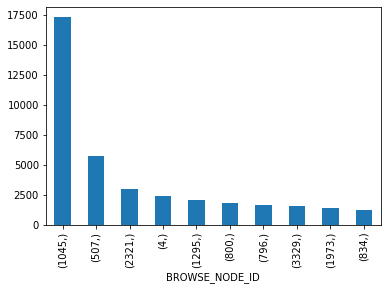

In [ ]:
sub_counts[:10].plot(kind = 'bar')

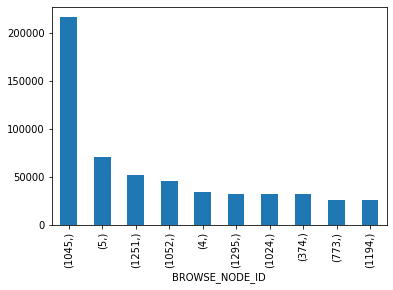

In [ ]:
dododod[:10].plot(kind ='bar')

In [ ]:
dododod.values.mean()

1119.2581344902387

In [ ]:
dododod.keys()[0:]

MultiIndex([(1045,),
            (   5,),
            (1251,),
            (1052,),
            (   4,),
            (1295,),
            (1024,),
            ( 374,),
            ( 773,),
            (1194,),
            ...
            ( 425,),
            ( 442,),
            (5811,),
            (1659,),
            (6706,),
            (6625,),
            (1308,),
            (   2,),
            (8282,),
            (5742,)],
           names=['BROWSE_NODE_ID'], length=2305)

In [ ]:
mod_values = dododod[dododod.values >= 1119.2581344902387].keys()

In [ ]:
len(mod_values)

417

In [ ]:
tobe_mod = []
for values in mod_values :
  tobe_mod.append(values)

In [ ]:
train_sample = train_data.sample(frac = 1 , random_state = 42)

In [ ]:
train_sample

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
1780524,West Code Mens Synthetic Leather Casual Sneake...,Best Deal Store Gives You The Best Products Wi...,"[Sole: EVA Sole,LifeStyle: Casual Shoes and Sn...",West Code,89
1064801,A Mobile Battery For PANASONIC T50 KLB160P349,"""Maximum protection and safety for your mobile...",NaN,A,5858
1162865,BeautyRx by Dr. Schultz Soothing Moisture Crea...,NaN,NaN,Beautyrx,200
343506,ArtzFolio Red Cat Doing Warrior Position of Yo...,NaN,[【LUXURIOUS & ELEGANT】: Magnificent piece of t...,ArtzFolio,700
2871584,jwf Women's Cotton Nighty (Pack of 2 Pcs) Pink...,JWF offers this delicately embellished rich lo...,"[100% soft cotton fabric for ultimate comfort,...",jwf,1313
...,...,...,...,...,...
122997,"Kupinda Art Kalamkari prints saree with ikkat,...","Turquoise color Traditional Saree,With Woven Z...",[Colour: Turquoise II Fabric: Chiffon II Lengt...,KUPINDA,1052
1904646,Atrangi Store Cotton Boy's Half Sleeve Round N...,Look smart in this Printed T-shirts from Atran...,[Material And Quality: Soft And Smooth Skin Fr...,Atrangi Store,5
2651470,Think Tech Designer Printed Back Case Cover fo...,This Think Tech Designer Printed Mobile Back C...,[It'S 3D Printing Technologies So Colour Will ...,Think Tech,1045
2508372,Blenzza Deco® Velvet Digital Print Baby Pillow...,Blenzza Deco kids pillow provides wonderful in...,"[FABRIC- VELVET,SIZE- 12 x 18 INCHES,MAKE LEAR...",Blenzza Deco,1079


In [ ]:
train_sample_sorted = train_sample.sort_values(by ='BROWSE_NODE_ID')

In [ ]:
train_sample_sorted.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
663829,"Ngel Girl's Fabric Big Size Baby Doll, 3-12 Ye...",Soft and Cuddly filling. loveable & huggable s...,"[Huggable and lovable for someone special.,Bat...",Ngel,0
2206627,Pink Reflections Barbie,NaN,NaN,NaN,0
1625598,"Anne Geddes Baby Bees 8"" Plush Doll",NaN,NaN,NaN,0
582551,"Barbie Spy Squad Junior Doll, Pink",NaN,"[Toys and Games,Pretty in pink, chelsea doll i...",Barbie,0
175096,Bratz Catz Doll - Yasmin,NaN,NaN,NaN,0


In [ ]:
new_sample  = train_sample_sorted[train_sample_sorted['BROWSE_NODE_ID']==1045][:1119]

In [ ]:
def mod_value(values,df):
  cf = df.copy()
  for value in values:
    to_insert = df[df['BROWSE_NODE_ID'] == value][:1119]
    cf = cf.drop(df[df.BROWSE_NODE_ID == value].index,axis = 0 )
    cf.append(to_insert)
  return cf 

In [ ]:
modified_df = mod_value(tobe_mod,train_sample_sorted)

In [ ]:
modified_df.fillna('NAN')

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NAN,Skyhorse Publishing,imusti,2
2293706,"Address Book: Bike for Girls, Women, Contacts,...",NAN,NAN,NAN,2
972859,GNC Mega Teen Tab - 120 Tablets,GNC milestones Teen Multivitamin for Boys 12yr...,[Multivitamin for teens easy to swallow caplet...,GNC,3
394634,Natures Aid Women 50+ Multi-vitamin and Minerl...,NAN,[Natures aid women’s 50+ multi-vitamin and min...,Natures Aid,3
1931519,Youth Infusion Infuse Your Vitamins Stimulant ...,NAN,NAN,NAN,3
...,...,...,...,...,...
1878648,Mothercare Baby Girls' Slim Jeans (QB449-1_Blu...,NAN,"[Color: Blue,65% Polyester, 34% cotton and 2% ...",Mothercare,9918
431730,Gini & Jony Baby Girl's Slim fit Jeans (121246...,NAN,"[Color Name: Ice Wash(7000),100% Cotton,Zip cl...",Gini & Jony,9918
935342,Mothercare Baby Girls' Slim Jeans (QB758-1_Yel...,NAN,"[100% Cotton,Machine wash]",Mothercare,9918
2456806,United Colors of Benetton Baby Girls' Jeans (1...,NAN,"[98% Cotton and 2% elastane,Normal wash]",United Colors of Benetton,9918


In [ ]:
modified_df.head()


,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
2293706,"Address Book: Bike for Girls, Women, Contacts,...",NaN,NaN,NaN,2
972859,GNC Mega Teen Tab - 120 Tablets,GNC milestones Teen Multivitamin for Boys 12yr...,[Multivitamin for teens easy to swallow caplet...,GNC,3
394634,Natures Aid Women 50+ Multi-vitamin and Minerl...,NaN,[Natures aid women’s 50+ multi-vitamin and min...,Natures Aid,3
1931519,Youth Infusion Infuse Your Vitamins Stimulant ...,NaN,NaN,NaN,3


In [ ]:
modified_df.to_csv('/content/drive/MyDrive/mod_df.csv')

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd

In [ ]:
import tensorflow_hub as hub

In [ ]:
# base_layer_2 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128/2', trainable = False)
# base_layer_3 = hub.KerasLayer('https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2',trainable = False)
base_layer_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [ ]:
modified_df = pd.read_csv('/content/drive/MyDrive/mod_df.csv')

In [ ]:
modified_df.value_counts('BROWSE_NODE_ID')

BROWSE_NODE_ID
1851    1106
2491    1105
2298    1102
3175    1096
1833    1093
        ... 
8282       2
6625       2
6706       2
2          2
5742       1
Length: 1888, dtype: int64

In [ ]:
import numpy as np 

In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_model_layer = base_layer_1(inputs)
lam_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(base_model_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(400,return_sequences=True))(lam_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1080))(x)

brand_inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
y = base_layer_1(brand_inputs)
y = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(y)
y  = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(450))(y)
y = tf.keras.layers.Dense(1080)(y)

concat = tf.keras.layers.concatenate(((x,y)))


z = tf.keras.layers.Dense(264, activation= 'relu')(concat)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(z)
LSTM_MODEL_1 = tf.keras.Model((inputs, brand_inputs), outputs)

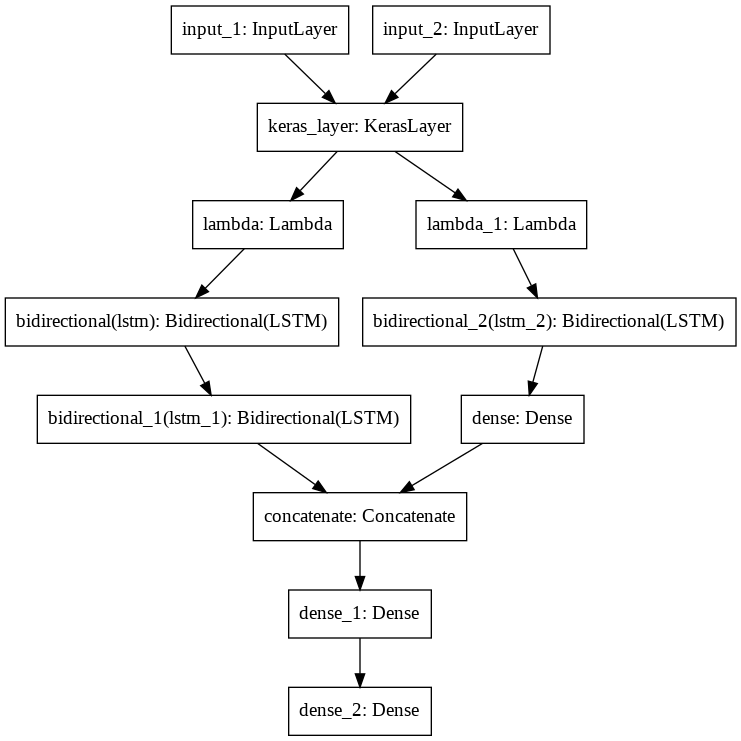

In [ ]:
tf.keras.utils.plot_model(LSTM_MODEL_1)

In [ ]:
LSTM_MODEL_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

In [ ]:
import numpy as np 
modified_df = modified_df.fillna('NAN')
lstm_inputs = tf.data.Dataset.from_tensor_slices((modified_df.TITLE.to_numpy().astype(np.str),modified_df.BRAND.to_numpy().astype(np.str)))

In [ ]:
lstm_outputs = tf.data.Dataset.from_tensor_slices(modified_df.BROWSE_NODE_ID.to_numpy())

In [ ]:
LSTM_dataset = tf.data.Dataset.zip((lstm_inputs,lstm_outputs)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
LSTM_MODEL_1.fit(LSTM_dataset,
                 steps_per_epoch= int(len(LSTM_dataset) * 0.1),
                 batch_size = 32,
                 epochs = 10)

Epoch 1/10
1721/1721 [==============================] - 345s 192ms/step - loss: 7.8836 - accuracy: 0.0574
Epoch 2/10
1721/1721 [==============================] - 327s 190ms/step - loss: 9.0526 - accuracy: 0.0000e+00
Epoch 3/10
1721/1721 [==============================] - 329s 191ms/step - loss: 9.5913 - accuracy: 0.0000e+00
Epoch 4/10
1721/1721 [==============================] - 329s 191ms/step - loss: 10.0937 - accuracy: 0.0000e+00
Epoch 5/10
1721/1721 [==============================] - 328s 190ms/step - loss: 10.5014 - accuracy: 0.0000e+00
Epoch 6/10
1721/1721 [==============================] - 325s 189ms/step - loss: 10.8571 - accuracy: 0.0000e+00
Epoch 7/10
1721/1721 [==============================] - 327s 190ms/step - loss: 11.1745 - accuracy: 0.0000e+00
Epoch 8/10
1721/1721 [==============================] - 328s 191ms/step - loss: 11.4793 - accuracy: 0.0000e+00
Epoch 9/10
1721/1721 [==============================] - 329s 191ms/step - loss: 11.7673 - accuracy: 0.0000e+00
Epoch 10

In [ ]:
# train_path = '/content/drive/MyDrive/dataset/train.csv'
test_path = '/content/drive/MyDrive/dataset/test.csv'
sample_sub_path = '/content/drive/MyDrive/dataset/sample_submission.csv'

In [ ]:
# Loading in the data 
# train_data = pd.read_csv(train_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)

# Loading the test dataset 
test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)
# # Sample submission 
sample_sub = pd.read_csv(sample_sub_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)



In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_model_layer = base_layer_1(inputs)
lam_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(base_model_layer)
x = tf.keras.layers.LSTM(1080,return_sequences=True)(lam_layer)
x = tf.keras.layers.LSTM(1080)(x)

brand_inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
y = base_layer_1(brand_inputs)
y = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(y)
y  = tf.keras.layers.LSTM(1080)(y)
# y = tf.keras.layers.LSTM(564)(y)
y = tf.keras.layers.Dense(1080)(y)

concat = tf.keras.layers.concatenate(((x,y)))


z = tf.keras.layers.Dense(264, activation= 'relu')(concat)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(z)
LSTM_MODEL_1 = tf.keras.Model((inputs, brand_inputs), outputs)

In [ ]:
LSTM_MODEL_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ['accuracy'])

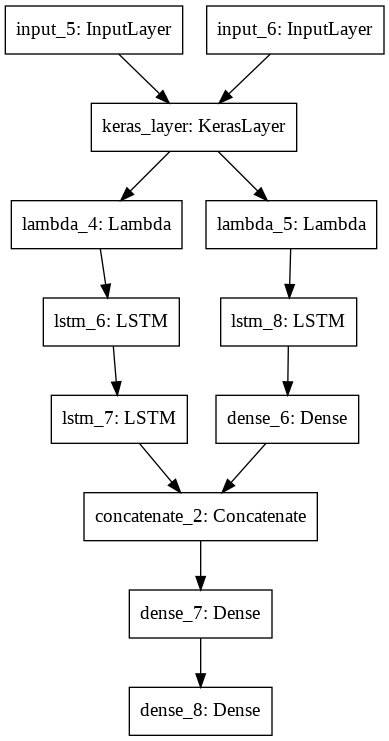

In [ ]:
tf.keras.utils.plot_model(LSTM_MODEL_1)

In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_layer  = base_layer_1(inputs)
x = tf.keras.layers.Dense(254,activation = 'relu')(base_layer)
x = tf.keras.layers.Dense(233,activation= 'relu')(x)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(x)
dense_model = tf.keras.Model(inputs,outputs)

dense_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['accuracy'])


In [ ]:
train_dataset_inputs= tf.data.Dataset.from_tensor_slices(modified_df['TITLE'].to_numpy().astype(np.str))
train_dataset_outputs = tf.data.Dataset.from_tensor_slices(modified_df['BROWSE_NODE_ID'].to_numpy().astype(np.uint8))
train_dataset = tf.data.Dataset.zip((train_dataset_inputs, train_dataset_outputs)).batch(64).prefetch(tf.data.AUTOTUNE)

In [ ]:
dense_hist = dense_model.fit(train_dataset, 
                             epochs = 3)

Epoch 1/3


TypeError: ignored

In [ ]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
import tensorflow_hub as hub


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/dataset/train.csv'
test_path = '/content/drive/MyDrive/dataset/test.csv'
sample_sub_path = '/content/drive/MyDrive/dataset/sample_submission.csv'

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [ ]:
# Loading in the data 
train_data = pd.read_csv(train_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)

# Loading the test dataset 
test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)
# # Sample submission 
sample_sub = pd.read_csv(sample_sub_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)



In [ ]:
def preprocess_dataframe(df,shuffle = True,drop_cols = ['DESCRIPTION' , 'BULLET_POINTS'] ,fill_na = True ):
  if shuffle: 
    df = df.sample(frac= 1 , random_state= 42)
  df = df.drop(df[df.BROWSE_NODE_ID > 9919].index,axis = 0 )
  if fill_na : 
    df = df.fillna(value = 'NAN')
  
  print(f'numrs of none values {df.isna().sum()}')
  return df 

  

In [ ]:
train_df = preprocess_dataframe(train_data)

numrs of none values TITLE             0
DESCRIPTION       0
BULLET_POINTS     0
BRAND             0
BROWSE_NODE_ID    0
dtype: int64


In [ ]:
base_layer_1 = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/HIGH_ACC_LSTM.h5',custom_objects = {"KerasLayer":base_layer_1})

In [ ]:


import pandas as pd
import numpy as np
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
df = train_df.copy()
#Cleaning TITLE
print("Cleaning TITLE column:")
punctuation_signs = list("?:!.,;")

nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
print("Removing escape sequence characters...")
df['Title'] = df['TITLE'].str.replace("\r", " ")
df['Title'] = df['Title'].str.replace("\n", " ")
df['Title'] = df['Title'].str.replace("    ", " ")
df['Title'] = df['Title'].str.replace('"', '')
df['Title'] = df['Title'].str.lower()
for punct_sign in punctuation_signs:
  df['Title'] = df['Title'].str.replace(punct_sign, '')
df['Title'] = df['Title'].str.replace("'s", "")

print("Lemmatizing Data...")
nrows = len(df)
lemmatized_text_list = []
for row in range(0, nrows):
    lemmatized_list = []
    text = df.iloc[row, 5]
    text_words = text.split(" ")
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    lemmatized_text = " ".join(lemmatized_list)
    lemmatized_text_list.append(lemmatized_text)
df['Title'] = lemmatized_text_list

print("hehe")

print("Dropping unnecessary columns...")
final_cols = ["Title", "BROWSE_NODE_ID"]
df = df[final_cols]
df = df.iloc[:15000, :]
print("New Dataframe head:")

Cleaning TITLE column:
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removing escape sequence characters...
Lemmatizing Data...
hehe
Dropping unnecessary columns...
New Dataframe head:


In [ ]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
base_model_layer = base_layer_1(inputs)
lam_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis =1))(base_model_layer)
x = tf.keras.layers.LSTM(564)(lam_layer)
x = tf.keras.layers.Dense(1080, activation= 'relu')(x)
outputs = tf.keras.layers.Dense(9919,activation='softmax')(x)

conv_model = tf.keras.Model(inputs, outputs)

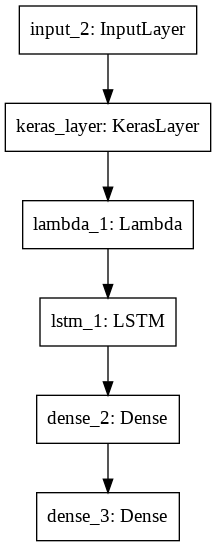

In [ ]:
tf.keras.utils.plot_model(conv_model)

In [ ]:
 conv_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
in_data = tf.data.Dataset.from_tensor_slices(df.Title.to_numpy().astype(np.str))
out_data = tf.data.Dataset.from_tensor_slices(df.BROWSE_NODE_ID.to_numpy())
dataset = tf.data.Dataset.zip((in_data,out_data)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
hist = conv_model.fit(dataset,
                 epochs = 10)

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.7154 - accuracy: 0.8061
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4603 - accuracy: 0.8779
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2897 - accuracy: 0.9270
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1816 - accuracy: 0.9569
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1189 - accuracy: 0.9740
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0935 - accuracy: 0.9779
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0879 - accuracy: 0.9784
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0835 - accuracy: 0.9781
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0835 - accuracy: 0.9766
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0724 - accura

In [ ]:
model.save('/content/drive/MyDrive/overfitting_model.h5')

In [ ]:


import pandas as pd
import numpy as np
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
df = test_data.copy()
#Cleaning TITLE
print("Cleaning TITLE column:")
punctuation_signs = list("?:!.,;")

nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
print("Removing escape sequence characters...")
df['Title'] = df['TITLE'].str.replace("\r", " ")
df['Title'] = df['Title'].str.replace("\n", " ")
df['Title'] = df['Title'].str.replace("    ", " ")
df['Title'] = df['Title'].str.replace('"', '')
df['Title'] = df['Title'].str.lower()
for punct_sign in punctuation_signs:
  df['Title'] = df['Title'].str.replace(punct_sign, '')
df['Title'] = df['Title'].str.replace("'s", "")

print("Lemmatizing Data...")
nrows = len(df)
lemmatized_text_list = []
for row in range(0, nrows):
    lemmatized_list = []
    text = str(df.iloc[row, 5])
    text_words = text.split(" ")
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    lemmatized_text = " ".join(lemmatized_list)
    lemmatized_text_list.append(lemmatized_text)
df['Title'] = lemmatized_text_list

print("hehe")

# print("Dropping unnecessary columns...")
# final_cols = ["Title", "BROWSE_NODE_ID"]
# df = df[final_cols]
# df = df.iloc[:15000, :]
# print("New Dataframe head:")

Cleaning TITLE column:
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removing escape sequence characters...
Lemmatizing Data...
hehe


In [ ]:
len(df.Title)

110775

In [ ]:
predictions = []
count = 0 
titles = []
for title in df.Title.to_numpy():
  count+=1
  titles.append(title)
  if count == 10000:
    pred = model.predict(titles)
    predictions.append(pred)
    count = 0 
    titles.clear()
  

In [ ]:
predictions = tf.constant(predictions)

In [ ]:
# predictions = model.predict(df.Title.to_numpy())

In [ ]:
flat_list

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.head()

In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID)

In [ ]:
submission.head()

In [ ]:
prediction_values = np.argmax(predictions,axis =1)

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',prediction_values)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('/content/preprocessed_fuk.csv',index=False)

In [ ]:
another_model = tf.keras.models.load_model('/content/drive/MyDrive/amazon_ml/LSTM_MODEL_preprocessed',custom_objects={"KerasLayer":base_layer_1})

In [ ]:
another_model.fit()

In [ ]:

import pandas as pd
import numpy as np
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

# #test file
# df_test = pd.read_csv('test.csv', escapechar = "\\", quoting = csv.QUOTE_NONE)
# print("Test Head")
# #print(df_test.head())

# '''#test columns
# for col in df_test.columns:
#   print(col)'''

# #train file
# df_train = pd.read_csv('train.csv', escapechar = "\\", quoting = csv.QUOTE_NONE)
# print("Train Head")
# #print(df_train.head())
df_test = test_data.copy()

'''#train columns
for col in df_train.columns:
  print(col)'''

print("Train.isna().sum():")
#print(df_train.isna().sum())

print("Train Shape:")
#print(df_train.shape)

'''print(df_train['TITLE'].is_unique)
print(df_train['DESCRIPTION'].is_unique)
print(df_train['BULLET_POINTS'].is_unique)
print(df_train['BRAND'].is_unique)
print(df_train['BROWSE_NODE_ID'].is_unique)'''

df = train_data.dropna()
print("New Train.isna().sum():")
#print(df.isna().sum())

punctuation_signs = list("?:!.,;")
nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

#Cleaning TITLE
print("Cleaning TITLE column:")

print("Removing escape sequence characters...")
df['Title'] = df['TITLE'].str.replace("\r", " ")
df['Title'] = df['Title'].str.replace("\n", " ")
df['Title'] = df['Title'].str.replace("    ", " ")
df['Title'] = df['Title'].str.replace('"', '')
df['Title'] = df['Title'].str.lower()
for punct_sign in punctuation_signs:
  df['Title'] = df['Title'].str.replace(punct_sign, '')
df['Title'] = df['Title'].str.replace("'s", "")

print("Lemmatizing Data...")
nrows = len(df)
lemmatized_text_list = []
for row in range(0, nrows):
    lemmatized_list = []
    text = df.iloc[row, 5]
    text_words = text.split(" ")
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    lemmatized_text = " ".join(lemmatized_list)
    lemmatized_text_list.append(lemmatized_text)
df['Title'] = lemmatized_text_list

print("hehe")

print("Dropping unnecessary columns...")
final_cols = ["Title", "BROWSE_NODE_ID"]
df = df[final_cols]
df = df.iloc[:15000, :]
print("New Dataframe head:")
#print(df.head())

print("Performing Train-Test-Split...")
X_train, X_test, y_train, y_test = train_test_split(df["Title"],
                                                    df["BROWSE_NODE_ID"],
                                                    test_size=0.15, 
                                                    random_state=8)

'''ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300'''

print("Vectorizing...")
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5)
print('1')
X_train_vectors_tfidf = tfidf.fit_transform(X_train).toarray()
#labels_train = y_train
print(X_train_vectors_tfidf.shape)
print('1')
X_test_vectors_tfidf = tfidf.transform(X_test).toarray()
#labels_test = y_test
print(X_test_vectors_tfidf.shape)

print('LogReg...')
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)

print("Prediction...")
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
#print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

print(accuracy_score(y_test, y_predict))

Train.isna().sum():
Train Shape:
New Train.isna().sum():
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Cleaning TITLE column:
Removing escape sequence characters...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Lemmatizing Data...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


hehe
Dropping unnecessary columns...
New Dataframe head:
Performing Train-Test-Split...
Vectorizing...
1
(12750, 6336)
1
(2250, 6336)
LogReg...
Prediction...
Confusion Matrix: [[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.5164444444444445


In [ ]:
X_train_vectors_tfidf = tfidf.transform(df.Title.to_numpy()).toarray()
predss = lr_tfidf.predict(X_train_vectors_tfidf)

In [ ]:
predss

array([   0,    1,    5, ..., 1145, 1296, 1045])

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission.head()

""


In [ ]:
submission.insert(0,'PRODUCT_ID',value = test_data.PRODUCT_ID[:15000])

In [ ]:
submission.head()

,PRODUCT_ID
0,1
1,2
2,3
3,4
4,5


In [ ]:
prediction_values = np.argmax(predss,axis =1)

AxisError: ignored

In [ ]:
submission.insert(1,'BROWSE_NODE_ID',predss)

In [ ]:
submission.tail()

,PRODUCT_ID,BROWSE_NODE_ID
14995,14996,1163
14996,14997,773
14997,14998,1145
14998,14999,1296
14999,15000,1045


In [ ]:
submission.to_csv('/content/ducked_preds.csv',index=False)

In [ ]:
from google.colab import files 
files.download('/content/ducked_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>